# 迭代法图像二值化

In [1]:
#coding:utf-8
import numpy as np
%matplotlib  inline
import cv2
import matplotlib.pyplot as plt
import pandas as pd
from pandas import DataFrame

In [2]:
src = cv2.cvtColor(cv2.imread('../datas/f2.jpg'),cv2.COLOR_BGR2RGB)
gray = cv2.cvtColor(src,cv2.COLOR_RGB2GRAY)

In [9]:
def iterative_threshold_segmen(src):
    rows,cols = src.shape[0],src.shape[1]
    dst = np.zeros((rows,cols),dtype=np.float64)
    
    c1,c2,sum_val = 0,0,0
    g1,g2,t0,t = 0.0,0.0,256,0
    s = True
    sum_val = np.sum(src)
    srcData = src.copy()
    
    # 初始化阈值
    Th = sum_val / (rows * cols)
    
    while s:
        for i in range(rows):
            for j in range(cols):
                if srcData[i,j] < Th:
                    c1 += 1
                    g1 += srcData[i,j]
                else:
                    c2 += 1
                    g2 += srcData[i,j]
        t = ((g1 / c1) + g2 / c2) / 2.0
        
        if np.abs(t - t0) < 1:
            s = False
            for i in range(rows):
                for j in range(cols):
                    if srcData[i,j] < Th:
                        dst[i,j] = 0
                    else:
                        dst[i,j] = 255
                        
        else:
            t0 = t
            c1 = 0
            c2=0
            g1 = 0.0
            g2=0.0
            Th = t
    dst[dst < 0] = 0
    dst[dst >255] = 255
    return cv2.convertScaleAbs(dst),Th

In [10]:
dst,Th = iterative_threshold_segmen(gray)
print('threshold:',Th)

threshold: 106.06142613627944


Text(0.5,1,'Interative Threshold')

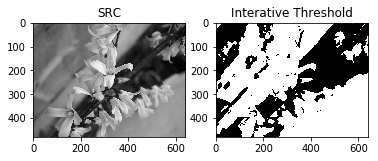

In [8]:
plt.subplot(121)
plt.imshow(gray,'gray')
plt.title('SRC')
plt.subplot(122)
plt.imshow(dst,'gray')
plt.title('Interative Threshold')

参考：

[1]. https://blog.csdn.net/trent1985/article/details/45148737